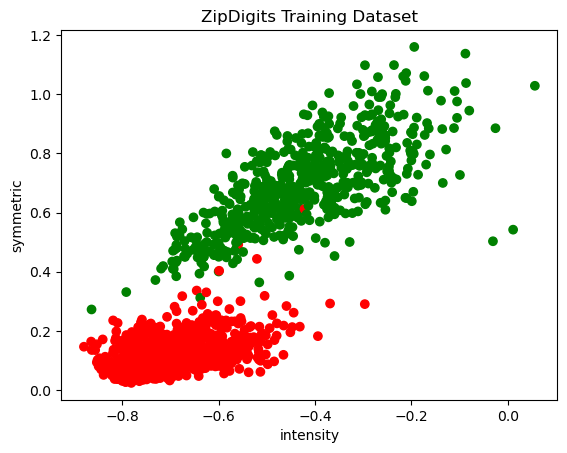

In [14]:
#HW1 Task4 code

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def read_file(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            numbers = line.strip().split(' ')
            label = float(numbers[0])
            grayscale = np.array([float(number) for number in numbers[1:]])
            if label == 1.0:
                label = -1.0
                data.append((label, grayscale))
            elif label == 5.0:
                label = 1.0
                data.append((label, grayscale))
    return data

train_data = read_file("ZipDigits.train")

def extract(data):
    intensities = []
    symmetrics = []
    labels = []
    
    for i in range(len(data)):
        labels.append(data[i][0])
        
        mid = int(len(data[i][-1])/2)
        intensity = np.mean(data[i][-1])
        intensities.append(intensity)
        
        left = data[i][-1][:mid]
        right = data[i][-1][mid:]
        diff = np.abs(left-right)
        symmetric = np.mean(diff)
        symmetrics.append(symmetric)
        
    return labels, intensities, symmetrics

train_labels, train_intensities, train_symmetrics = extract(train_data)

plt.scatter(train_intensities, train_symmetrics, c=ListedColormap(("red", "green"))(train_labels))
plt.title("ZipDigits Training Dataset")
plt.xlabel("intensity")
plt.ylabel("symmetric")
plt.show()

In [15]:
# Class activity 1 code
def pla(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    misclassifies = []
    for i in range(max_iter):
        misclassify = 0
        for i in range(X.shape[0]):
            if np.sign(np.dot(X[i], w)) != y[i]:
                w += y[i] * X[i]
                misclassify += 1
        misclassifies.append(misclassify)
        if misclassify == 0:
            break
    return misclassifies, w



In [16]:
def combine(train_intensities, train_symmetrics):
    X = []
    for i in range(len(train_intensities)):
        x = []
        x.append(1.0)
        x.append(train_intensities[i])
        x.append(train_symmetrics[i])
        X.append(x)
    return X

X = np.array(combine(train_intensities, train_symmetrics))

[-6.         -2.72595703 10.92678906]


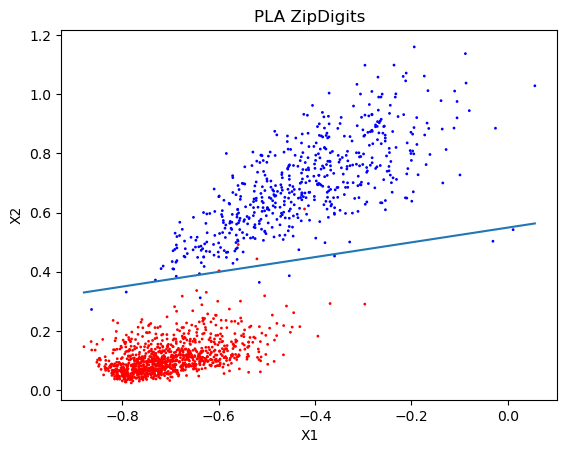

In [18]:
# [LP 1] a)

misclassifies_pla, w_pla = pla(X, train_labels)
print(w_pla)

plt.scatter(X[:, 1], X[:, 2], c=ListedColormap(("red", "blue"))(train_labels), s=1)

x_decision = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_decision = (-w_pla[0] - w_pla[1] * x_decision) / w_pla[2]
plt.plot(x_decision, y_decision)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('PLA ZipDigits')
plt.show()

In [19]:
# [LP 1] b)

def pocket(X, y, max_iterations=1000):
    w_pocket = np.zeros(X.shape[1])
    best_w = np.copy(w_pocket)
    min_error = float('inf')
    errors = []
    
    for t in range(max_iterations):
        errors_t = 0
        for i in range(X.shape[0]):
            if np.sign(np.dot(X[i], w_pocket)) != y[i]:
                w_pocket += y[i] * X[i]
                errors_t += 1
        
        if errors_t < min_error:
            min_error = errors_t
            best_w = np.copy(w_pocket)
        
        errors.append(errors_t)
    
    return best_w, errors

[-5.         -2.41088672 10.28274219]


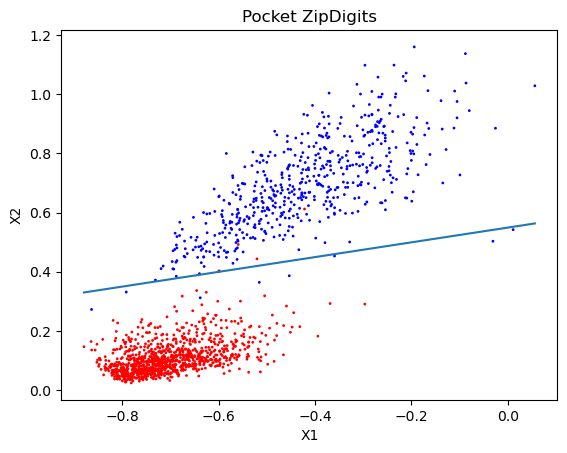

In [20]:
best_w, errors = pocket(X, train_labels)
print(best_w)

plt.scatter(X[:, 1], X[:, 2], c=ListedColormap(("red", "blue"))(train_labels), s=1)

x_decision = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_decision = (-w_pla[0] - w_pla[1] * x_decision) / w_pla[2]
plt.plot(x_decision, y_decision)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Pocket ZipDigits')
plt.show()

In [23]:
# [LP 1] c)
pla_mean = np.mean(np.array(misclassifies_pla)/(len(train_labels)))
pocket_mean = np.mean(np.array(errors)/(len(train_labels)))

print(pla_mean, pocket_mean)

if pla_mean < pocket_mean:
    print("PLA has better in sample error")
elif pocket_mean:
    print("Pocket has better in sample error")
else:
    print("Both algorithm has the same measure of in sample error")

0.010002562459961563 0.010002562459961563
Pocket has better in sample error


In [10]:
# [LP 2] Setup: code from Task 2

def third_order_poly(X):
    X_final = []
    for i in range(X.shape[0]):
        x1 = X[i][1]
        x2 = X[i][2]
        x3 = x1 ** 2
        x4 = x1 * x2
        x5 = x2 ** 2
        x6 = x1 ** 3
        x7 = (x1 ** 2) * x2
        x8 = x1 * (x2 ** 2)
        x9 = x2 ** 3
        x_poly = np.array([1.0, x1, x2, x3, x4, x5, x6, x7, x8, x9])
        X_final.append(x_poly)
    return X_final

X_third = np.array(third_order_poly(X))

# code based on processor's provided samply code in LinearRegressionNonLinear.ipynb
def plot4poly(w, color='red'):
  axes = plt.gca()
  xlims = axes.get_xlim()
  ylims = axes.get_ylim()
  x1 = np.linspace(xlims[0], xlims[1], 1000)
  x2 = np.linspace(ylims[0], ylims[1], 1000)
  # meshgrid
  XM1, XM2 = np.meshgrid(x1, x2)
  def f(x1, x2, w):
    return w[0] + w[1]*x1 + w[2]*x2 + w[3]*(x1**2) + w[4]*(x1*x2) + w[5]*(x2**2) + w[6]*(x1**3) + w[7]*((x1**2)*x2) + w[8]*(x1*(x2**2)) + w[9]*(x2**3)
  plt.contour(XM1, XM2, f(XM1, XM2, w), 1, colors = color)

[  0.          16.70394531  10.55479687  -2.61378437  -9.53154884
  -4.59913599 -13.54045919  16.15856314   1.47792322  -3.45756674]
The average misclassification error rate for 3rd order polynomial pocket algorithm is  0.00781037796284433


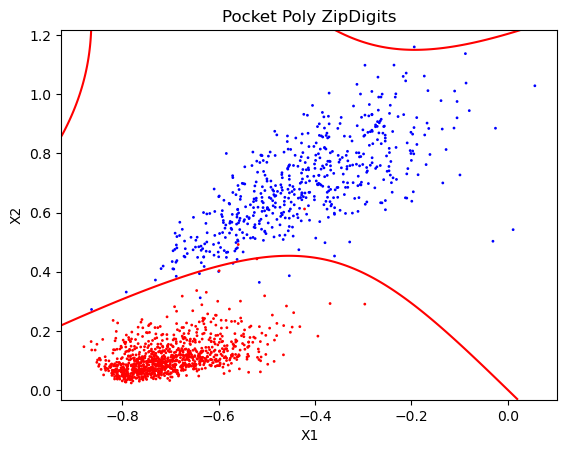

In [24]:
# [LP 2]

best_w, errors = pocket(X_third, train_labels)
print(best_w)

pocket_mean = np.mean(np.array(errors)/(len(train_labels)))

print("The average misclassification error rate for 3rd order polynomial pocket algorithm is ", pocket_mean)

plt.scatter(X[:, 1], X[:, 2], c=ListedColormap(("red", "blue"))(train_labels), s=1)
plot4poly(best_w)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Pocket Poly ZipDigits')
plt.show()